In [1]:
# activate cvenv as kernel

In [2]:
# if you are outside of the package you would run: "import ProjectDatasets.CZIDataset"
import czi
import matplotlib.pyplot as plt
import skimage
import numpy as np

In [3]:
skimage.__version__

'0.22.0'

In [4]:
folder = "/mnt/datadisk/FactinMIP"

In [5]:
dataset = czi.CZIDataset(folder=folder,twod_vid_channel=0)
MIP_video, shape, dims = dataset[7]
print(MIP_video.shape)

(241, 2048, 474)


In [6]:
def display_video(video, cell_idx=None, num_frames_to_display=3, num_cols=3):
    
    # Calculate number of rows needed
    num_rows = (num_frames_to_display + num_cols - 1) // num_cols  
    # Create subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
    axes = axes.flatten()

    # Loop through the first few frames
    for i in range(min(num_frames_to_display, len(video))):
        ax = axes[i]
        if (cell_idx != None and type(cell_idx) == int):
            ax.imshow(video[i][cell_idx], cmap='gray')  # Use cmap='gray' for grayscale images
            ax.set_title(f'Frame {i}')
            ax.axis('off')  # Hide axes
        else: 
            ax.imshow(video[i], cmap='gray')  # Use cmap='gray' for grayscale images
            ax.set_title(f'Frame {i}')
            ax.axis('off')  # Hide axes

    # Turn off unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

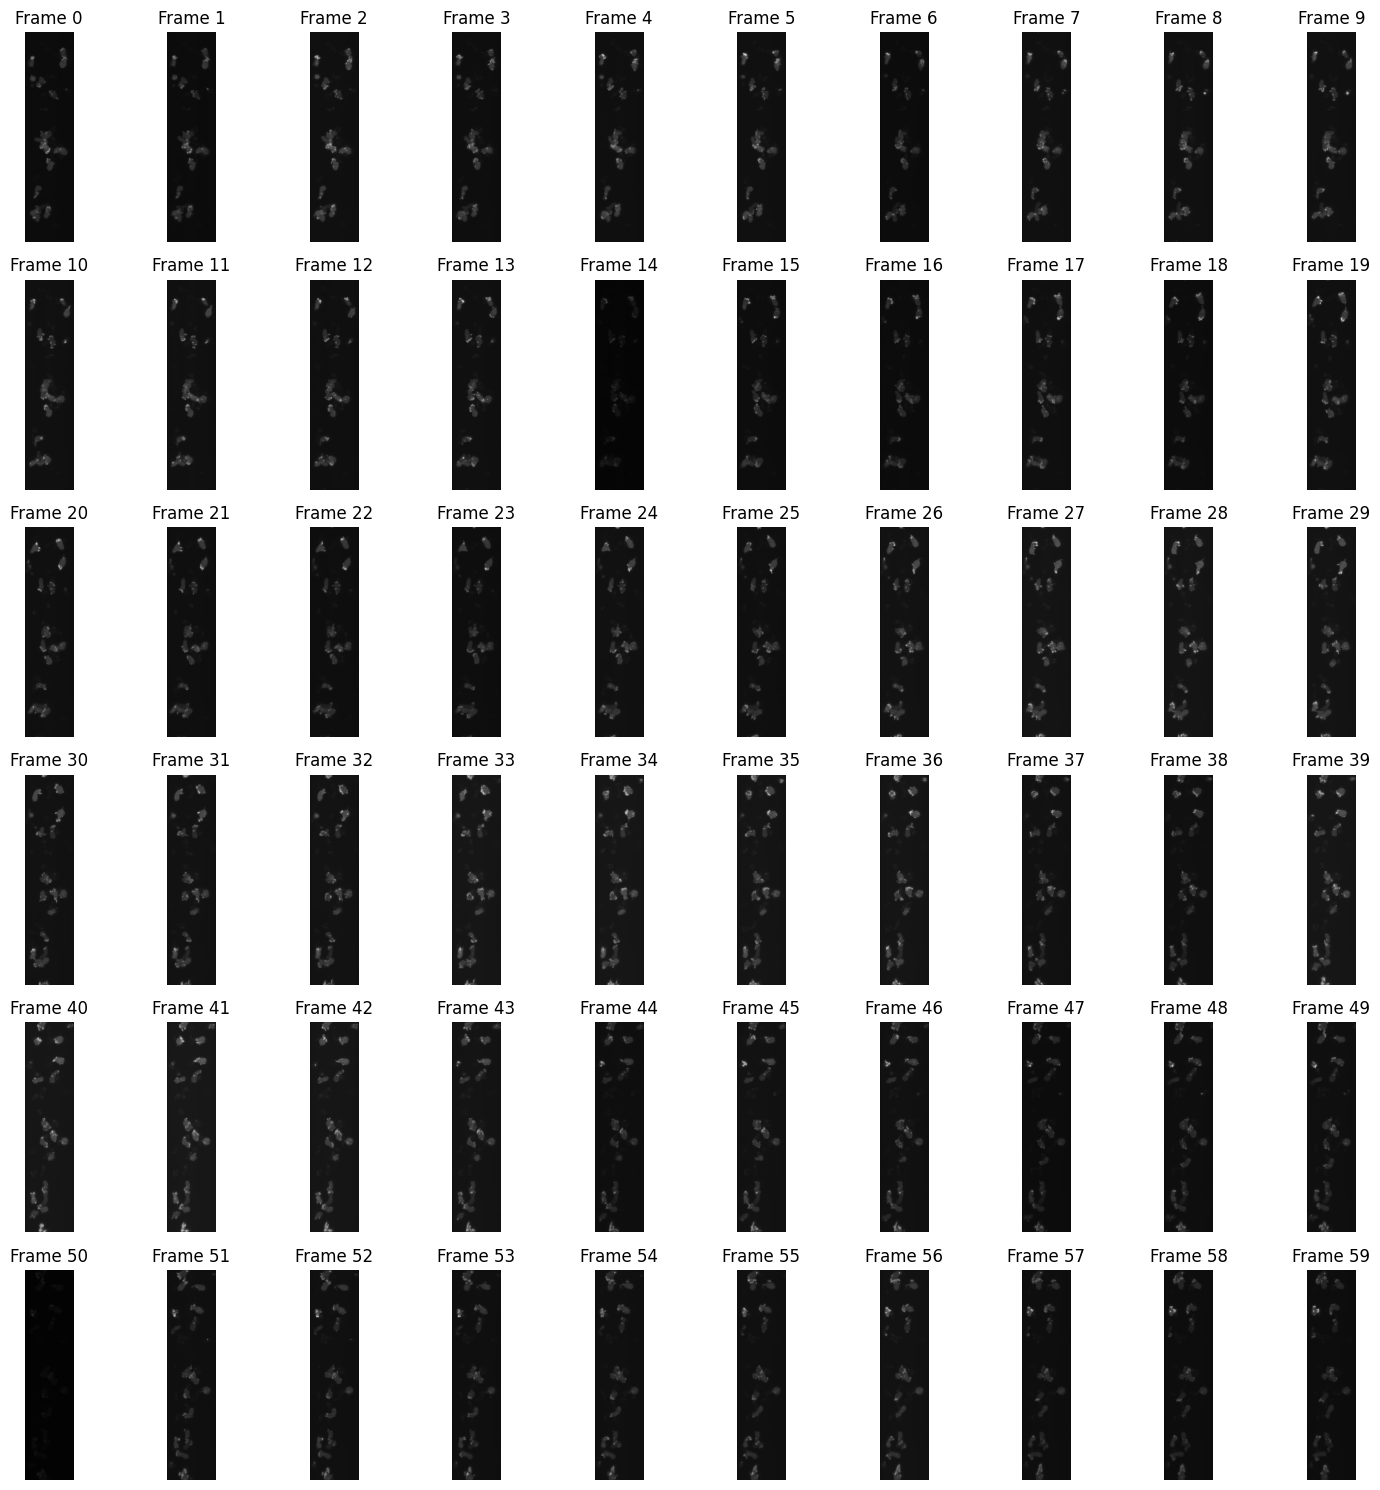

In [7]:
display_video(MIP_video,num_frames_to_display=60, num_cols =10)

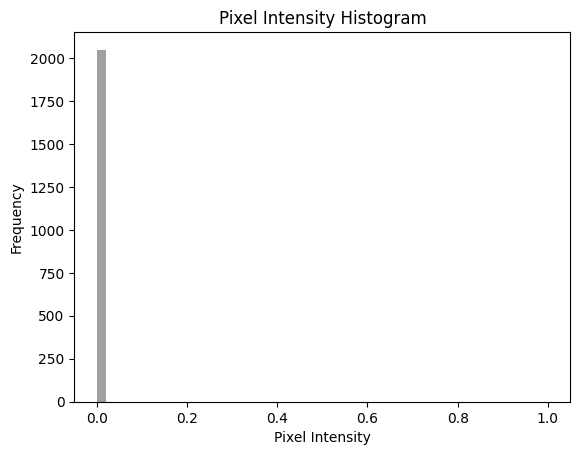

In [8]:
pixel_values = np.array(MIP_video[1]).flatten()  # Flatten the 2D array into 1D

# Plot histogram
plt.hist(pixel_values, bins=50, range=(0, 1), color='gray', alpha=0.75)
plt.title('Pixel Intensity Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


In [9]:
video_slices = czi.Transforms2D.default_bounding_boxes_pipeline_2dvideo(MIP_video)

TypeError: slice indices must be integers or None or have an __index__ method

In [ ]:
plt.figure()
plt.plot(range(len(num_cells_frames)), num_cells_frames)
plt.title('Number of Cells per frame')
plt.ylabel('num cells')
plt.xlabel('frame')
plt.show()

NameError: name 'num_cells_frames' is not defined

<Figure size 640x480 with 0 Axes>

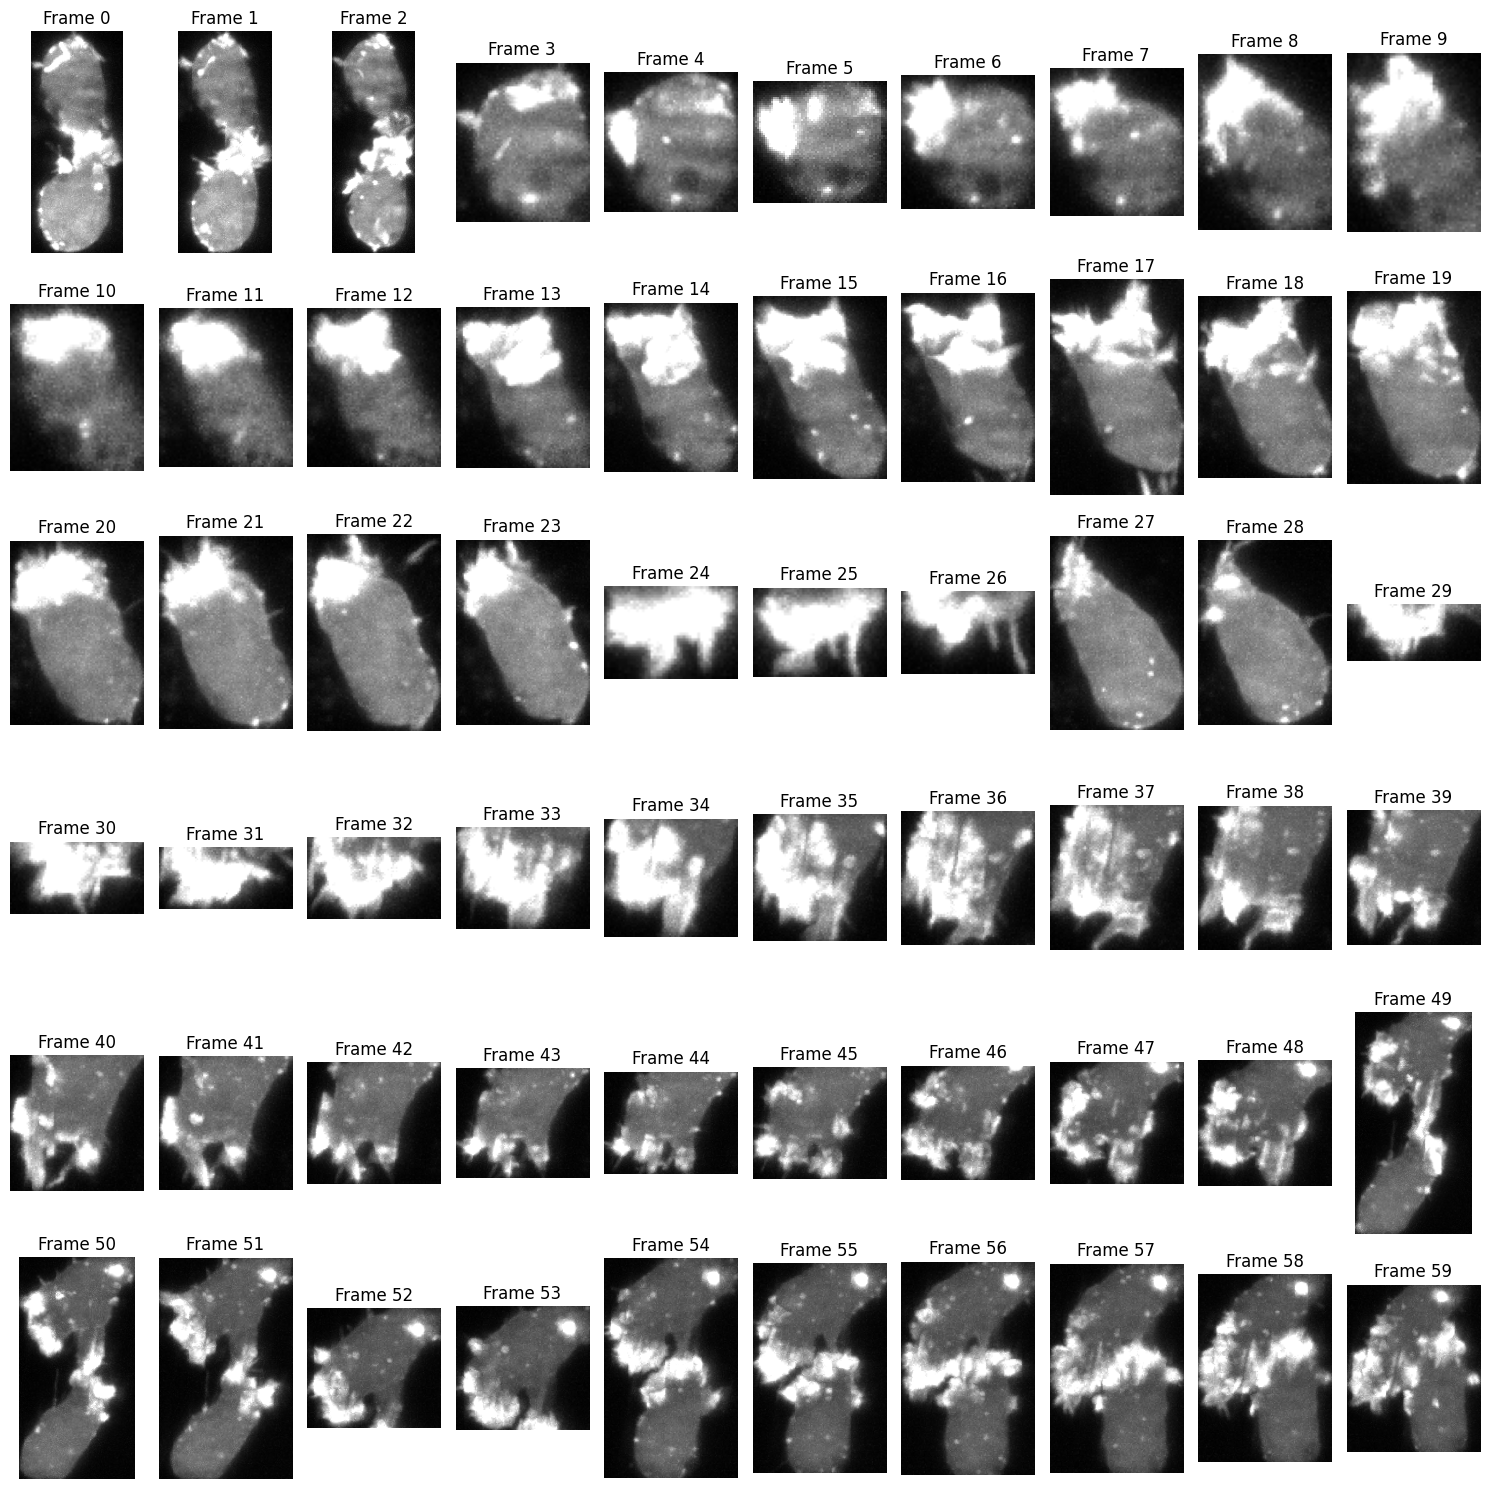

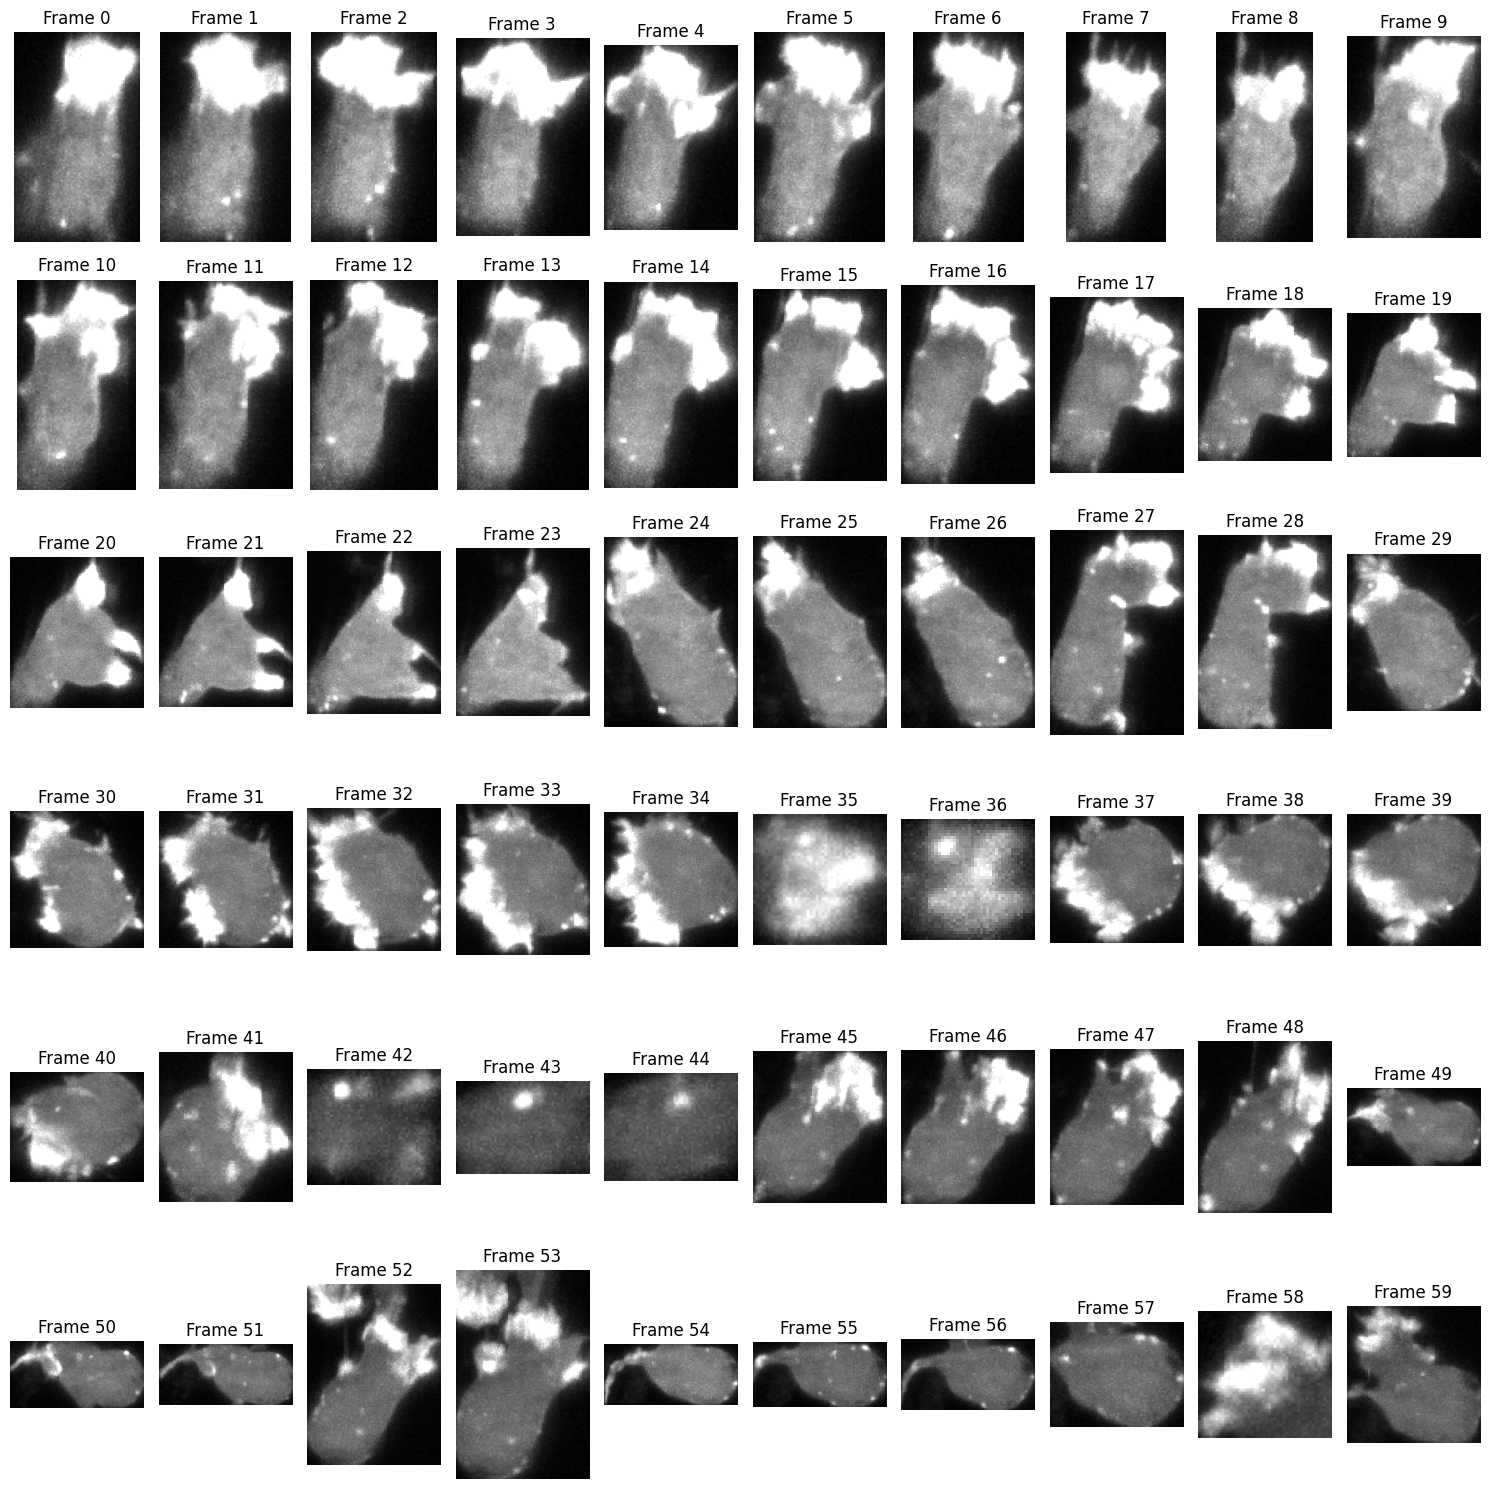

In [ ]:
display_video(video_slices, cell_idx=0, num_frames_to_display=60, num_cols=10 )
display_video(video_slices, cell_idx=1, num_frames_to_display=60, num_cols=10 )

Text(0, 0.5, 'intensity over time')

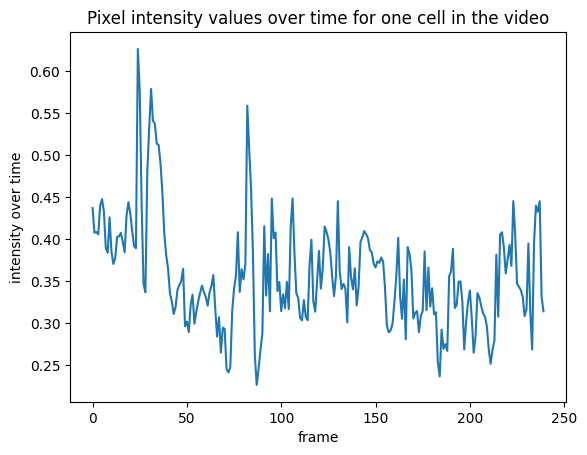

In [ ]:
plt.figure()
plt.title("Pixel intensity values over time for one cell in the video")
plt.plot(range(len(video_slices)), [np.mean(frame_bound_box[0]) for frame_bound_box in video_slices])
plt.xlabel("frame")
plt.ylabel("intensity over time")